In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score

In [2]:
data = pd.read_excel("E:\DS Assignments1\\EastWestAirlines.xlsx",sheet_name='data')
data.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [3]:
data.shape

(3999, 12)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [5]:
data.isna().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [6]:
# Normalized function
def norm_func(i):
    x = (i-i.min())/i.max()-i.min()
    return(x)

In [7]:
#Normalized data frame
#Ignore the 1st column i.e. ID#
df_norm = norm_func(data.iloc[:,1:])

In [8]:
df_norm

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.016508,0.0,-1.0,-1.0,-1.0,0.000660,0.011628,0.000000,0.000000,-1.156461,0.0
1,0.011288,0.0,-1.0,-1.0,-1.0,0.000815,0.023256,0.000000,0.000000,-1.160318,0.0
2,0.024257,0.0,-1.0,-1.0,-1.0,0.015636,0.046512,0.000000,0.000000,-1.152363,0.0
3,0.008667,0.0,-1.0,-1.0,-1.0,0.001896,0.011628,0.000000,0.000000,-1.162247,0.0
4,0.057338,0.0,-0.4,-1.0,-1.0,0.164211,0.302326,0.067398,0.075472,-1.164296,1.0
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,-1.0,-1.0,-1.0,0.032330,0.046512,0.006490,0.018868,-1.831123,1.0
3995,0.037766,0.0,-1.0,-1.0,-1.0,0.003720,0.058140,0.000000,0.000000,-1.832088,1.0
3996,0.043169,0.0,-0.6,-1.0,-1.0,0.096505,0.093023,0.000000,0.000000,-1.831244,1.0
3997,0.032202,0.0,-1.0,-1.0,-1.0,0.001896,0.011628,0.016225,0.018868,-1.831365,0.0


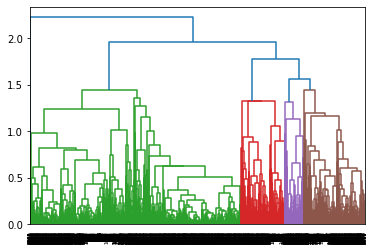

In [9]:
#Create Dendrogram
Dendrogram = sch.dendrogram(sch.linkage(df_norm, method = 'complete'))

In [10]:
#create clusters
hc = AgglomerativeClustering(affinity='euclidean', linkage='complete', n_clusters=3,)

In [11]:
hc


AgglomerativeClustering(linkage='complete', n_clusters=3)

In [12]:
# Save cluster for chart
y_hc = hc.fit_predict(df_norm)

In [13]:
y_hc


array([2, 2, 2, ..., 0, 2, 2], dtype=int64)

In [14]:
data.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [15]:
# Create a new data frame for clusters number
clusters = pd.DataFrame(y_hc, columns=['Clusters'])

In [16]:
clusters.iloc[:10,:]

,Clusters
0,2
1,2
2,2
3,2
4,0
5,2
6,2
7,0
8,0
9,0


In [17]:
df_norm['h_clusterid'] = clusters

In [18]:
df_norm

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid
0,0.016508,0.0,-1.0,-1.0,-1.0,0.000660,0.011628,0.000000,0.000000,-1.156461,0.0,2
1,0.011288,0.0,-1.0,-1.0,-1.0,0.000815,0.023256,0.000000,0.000000,-1.160318,0.0,2
2,0.024257,0.0,-1.0,-1.0,-1.0,0.015636,0.046512,0.000000,0.000000,-1.152363,0.0,2
3,0.008667,0.0,-1.0,-1.0,-1.0,0.001896,0.011628,0.000000,0.000000,-1.162247,0.0,2
4,0.057338,0.0,-0.4,-1.0,-1.0,0.164211,0.302326,0.067398,0.075472,-1.164296,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,-1.0,-1.0,-1.0,0.032330,0.046512,0.006490,0.018868,-1.831123,1.0,0
3995,0.037766,0.0,-1.0,-1.0,-1.0,0.003720,0.058140,0.000000,0.000000,-1.832088,1.0,0
3996,0.043169,0.0,-0.6,-1.0,-1.0,0.096505,0.093023,0.000000,0.000000,-1.831244,1.0,0
3997,0.032202,0.0,-1.0,-1.0,-1.0,0.001896,0.011628,0.016225,0.018868,-1.831365,0.0,2


In [19]:
data['h_clusterid'] = clusters

In [20]:
data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid
0,1,28143,0,1,1,1,174,1,0,0,7000,0,2
1,2,19244,0,1,1,1,215,2,0,0,6968,0,2
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,2
3,4,14776,0,1,1,1,500,1,0,0,6952,0,2
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,2
